In [69]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [70]:
# Load the dataset
file_path = "data_vt.xlsx"  # Replace with your dataset path
df = pd.read_excel(file_path)

In [71]:
# Inspect the dataset
print("Dataset preview:")
print(df.head())

Dataset preview:
   Year  GEOID  STATEID           COUNTY  COUNTYID  TOT_POP  NHSP_POP  \
0  2016  17023       17     Clark County         1    16089     15862   
1  2016  17025       17      Clay County         2    13466     13284   
2  2016  17027       17   Clinton County         3    37858     36704   
3  2016  17029       17     Coles County         4    52802     51578   
4  2016  17033       17  Crawford County         5    19441     19026   

   HSP_POP  WHT_NHSP  BLK_NHSP  ...  APV_CVAP  TOT_VOT_REG  CREP_TOT_VOTE  \
0      227    155574        68  ...      9787         7928           1291   
1      182     12991        84  ...      8660         6350            810   
2     1154     34692      1271  ...     26532        17419           1235   
3     1224     48195      1928  ...     33163        21863           1432   
4      415     17714       814  ...     13392         8728            823   

   CDEM_TOT_VOTE   CWINNER  PDEM_TOT_VOT  PREP_TOT_VOT   PWINNER        CVT  \
0 

In [72]:
df.describe()

,Year,GEOID,STATEID,COUNTYID,TOT_POP,NHSP_POP,HSP_POP,WHT_NHSP,BLK_NHSP,AIA_NHSP,...,TOT_CVAP,BPV_CVAP,APV_CVAP,TOT_VOT_REG,CREP_TOT_VOTE,CDEM_TOT_VOTE,PDEM_TOT_VOT,PREP_TOT_VOT,CVT,PVT
count,180.000000,180.000000,180.0,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2019.333333,17105.000000,17.0,15.500000,29695.350000,28683.277778,1012.072222,24792.305556,3606.905556,158.850000,...,18881.711111,2975.238889,15907.027778,13674.983333,3065.516667,2994.927778,2386.111111,4422.894444,36.865460,34.808623
std,1.977527,58.563817,0.0,8.679585,45904.754952,43812.977911,2180.716012,30329.919903,13739.090271,352.832489,...,29987.120292,3378.441655,27580.339017,25088.156245,4769.881917,4452.074393,8410.169976,8294.217451,34.213844,39.890410
min,2016.000000,17023.000000,17.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1633.000000,339.000000,-4497.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,17049.000000,17.0,8.000000,10508.500000,10377.750000,162.500000,10107.000000,74.000000,18.000000,...,5281.500000,1060.500000,3949.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.500000,17094.000000,17.0,15.500000,16153.000000,15754.500000,441.000000,15369.500000,281.500000,62.000000,...,10781.000000,1870.500000,9100.500000,8662.000000,1018.500000,1340.000000,0.000000,0.000000,29.287965,0.000000
75%,2021.000000,17157.000000,17.0,23.000000,34684.000000,33817.500000,966.000000,32798.750000,1656.750000,160.000000,...,20860.500000,3186.250000,15413.500000,17407.750000,4379.000000,4060.750000,1588.000000,5790.250000,65.847399,69.457490
max,2022.000000,17199.000000,17.0,30.000000,265569.000000,255561.000000,17392.000000,165693.000000,79868.000000,2325.000000,...,198690.000000,22215.000000,192333.000000,197310.000000,29091.000000,25600.000000,68325.000000,57150.000000,107.375000,98.931579


In [73]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Year             0
GEOID            0
STATEID          0
COUNTY           0
COUNTYID         0
TOT_POP          0
NHSP_POP         0
HSP_POP          0
WHT_NHSP         0
BLK_NHSP         0
AIA_NHSP         0
ASN_NHSP         0
MEDN_INC         0
MALE_POP         0
FEMALE_POP       0
TOT_CVAP         0
BPV_CVAP         0
APV_CVAP         0
TOT_VOT_REG      0
CREP_TOT_VOTE    0
CDEM_TOT_VOTE    0
CWINNER          0
PDEM_TOT_VOT     0
PREP_TOT_VOT     0
PWINNER          0
CVT              0
PVT              0
dtype: int64


# Model Preparing


In [74]:
# Drop the specified columns from the DataFrame
df_CWINNER = df.drop(columns=['PREP_TOT_VOT', 'PDEM_TOT_VOT','PVT','PWINNER','CWINNER','COUNTY','GEOID','COUNTYID','STATEID'])

# Drop rows where the year is 2019 or 2021
df_CWINNER = df_CWINNER[~df_CWINNER['Year'].isin([2019,2021])]

# Display the new DataFrame
print(df_CWINNER.head())  # Show first few rows to verify


   Year  TOT_POP  NHSP_POP  HSP_POP  WHT_NHSP  BLK_NHSP  AIA_NHSP  ASN_NHSP  \
0  2016    16089     15862      227    155574        68        37        78   
1  2016    13466     13284      182     12991        84        80        42   
2  2016    37858     36704     1154     34692      1271       190       302   
3  2016    52802     51578     1224     48195      1928       269       683   
4  2016    19441     19026      415     17714       814       113       142   

   MEDN_INC  MALE_POP  FEMALE_POP  TOT_CVAP  BPV_CVAP  APV_CVAP  TOT_VOT_REG  \
0     48693      7670         886     12330      2543      9787         7928   
1     45984      6492         704     10370      1710      8660         6350   
2     63929     17982        2040     29535      3003     26532        17419   
3     38800     23782        2530     42505      9342     33163        21863   
4     47364      9053        1007     15455      2163     13392         8728   

   CREP_TOT_VOTE  CDEM_TOT_VOTE        CVT  

In [75]:
train_data = df_CWINNER[df_CWINNER['Year'] != 2022]  # Training data: years other than 2022
test_data = df_CWINNER[df_CWINNER['Year'] == 2022]   # Test data: only year 2022

In [76]:
df_CWINNER = df_CWINNER.drop(columns=['Year'])

Top 5 correlations with 'CVT' column:
CDEM_TOT_VOTE    0.185939
CREP_TOT_VOTE    0.166866
MEDN_INC        -0.052196
BLK_NHSP        -0.194895
HSP_POP         -0.238178
AIA_NHSP        -0.239371
FEMALE_POP      -0.258654
APV_CVAP        -0.263773
WHT_NHSP        -0.279112
ASN_NHSP        -0.285877
Name: CVT, dtype: float64


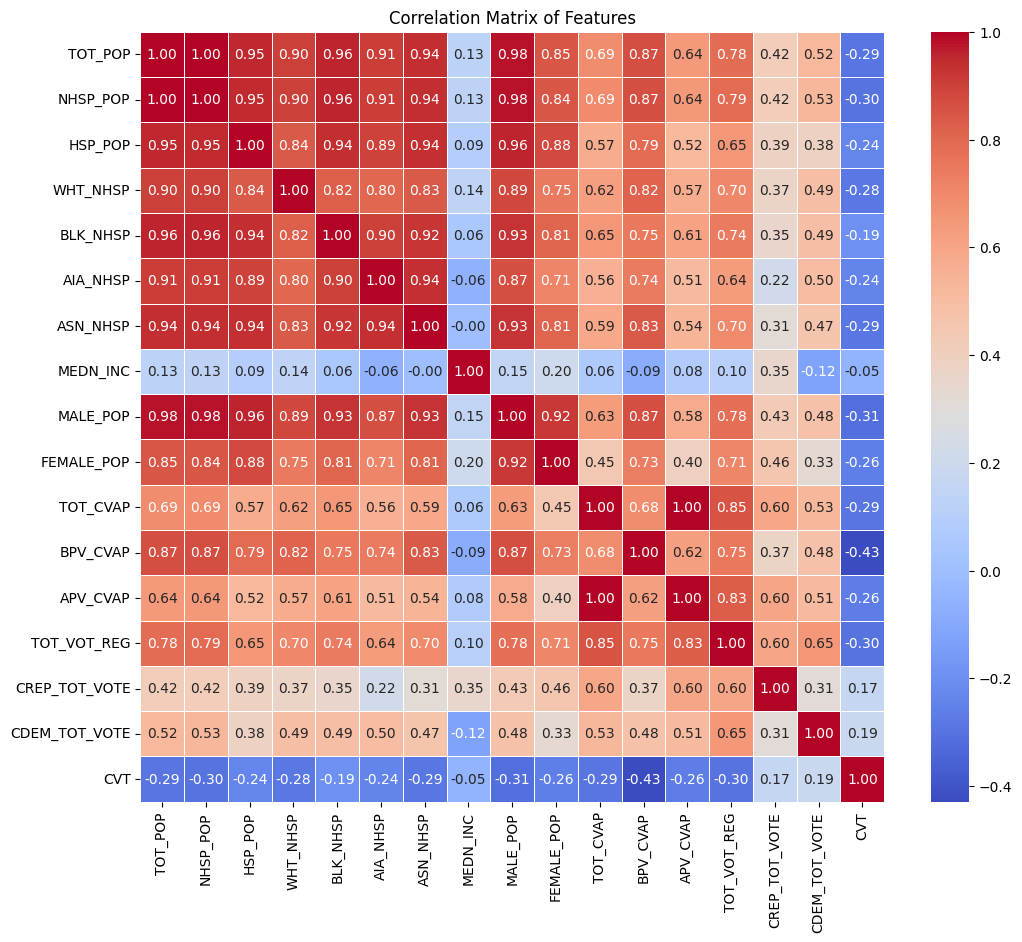

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the Correlation Matrix
correlation_matrix = df_CWINNER.corr()

# Step 2: Get the correlations with 'CVT' column
cvt_correlations = correlation_matrix['CVT']

# Step 3: Sort the correlations in descending order
top_5_correlation_with_cvt = cvt_correlations.drop('CVT').sort_values(ascending=False).head(10)

# Step 4: Print the top 5 correlations with the 'CVT' column
print("Top 5 correlations with 'CVT' column:")
print(top_5_correlation_with_cvt)

# Step 5: Plot the Correlation Matrix (Optional, for visualization)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [79]:
# Select features and target variable
features1 = ['TOT_POP','BLK_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','CREP_TOT_VOTE','CDEM_TOT_VOTE']
features2 = ['TOT_POP','BLK_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','CREP_TOT_VOTE','CDEM_TOT_VOTE', 'HSP_POP']
features3 = ['TOT_POP','BLK_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','CREP_TOT_VOTE','CDEM_TOT_VOTE','AIA_NHSP']
features4 = ['TOT_POP','BLK_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','CREP_TOT_VOTE','CDEM_TOT_VOTE','FEMALE_POP']
features5 = ['TOT_POP','BLK_NHSP', 'TOT_CVAP','MEDN_INC','TOT_VOT_REG','CREP_TOT_VOTE','CDEM_TOT_VOTE','FEMALE_POP','AIA_NHSP','HSP_POP']
features6 = ['BLK_NHSP','MEDN_INC','CREP_TOT_VOTE','CDEM_TOT_VOTE','FEMALE_POP','AIA_NHSP','HSP_POP','APV_CVAP']
features7 = ['CREP_TOT_VOTE','CDEM_TOT_VOTE','TOT_CVAP']
target = 'CVT'

In [80]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature sets
feature_sets = [
    features1,  # First set of features
    features2,  # Second set of features
    features3,  # Third set of features
    features4,
    features5,
    features6,
    features7
]

# Loop over each feature set
for i, features in enumerate(feature_sets, start=1):
    # Prepare the data for the current feature set
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Scale the features to improve linear regression model performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Predict the target variable (CT) on the test set (2022 data)
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model performance using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print out the evaluation metrics for this feature set
    print(f"Feature Set {i}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")

    # print model coefficients to understand feature importance
    print(f"Model Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print("-" * 50)


Feature Set 1:
Mean Absolute Error (MAE): 9.109303585490725
Mean Squared Error (MSE): 144.1970323326606
R-squared: 0.043274384248648934
Model Coefficients: [-31.20502067  31.1300418   -8.70947452  -2.02688424 -24.90943863
  17.81934939  23.33825936]
Intercept: 53.11580241870489
--------------------------------------------------
Feature Set 2:
Mean Absolute Error (MAE): 9.281361118717848
Mean Squared Error (MSE): 148.28061283174773
R-squared: 0.016180441992984185
Model Coefficients: [-23.5786737   33.24561969  -9.55342875  -2.30687263 -26.59209272
  19.35833778  22.29150878  -8.36766419]
Intercept: 53.11580241870489
--------------------------------------------------
Feature Set 3:
Mean Absolute Error (MAE): 9.971043441893395
Mean Squared Error (MSE): 216.19864574069746
R-squared: -0.43444548840432096
Model Coefficients: [-37.41336709  29.354569    -8.57646489  -1.34432052 -24.89170489
  17.33968612  23.45727668   7.97002073]
Intercept: 53.11580241870489
---------------------------------

# Random Forest

In [81]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature sets
feature_sets = [
    features1,  # First set of features
    features2,  # Second set of features
    features3,  # Third set of features
    features4,
    features5,
    features6,
    features7
]

# Loop over each feature set
for i, features in enumerate(feature_sets, start=1):
    # Prepare the data for the current feature set
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Scale the features to improve model performance (optional for RandomForest, but can help in some cases)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Predict the target variable (CT) on the test set (2022 data)
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model performance using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print out the evaluation metrics for this feature set
    print(f"Feature Set {i}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")

    # print feature importances to understand which features are most important
    print(f"Feature Importances: {model.feature_importances_}")
    print("-" * 50)


Feature Set 1:
Mean Absolute Error (MAE): 16.181376646219906
Mean Squared Error (MSE): 362.26094938886905
R-squared: -1.4035468987126545
Feature Importances: [0.39437588 0.02130835 0.08395478 0.03640923 0.11359469 0.14969582
 0.20066124]
--------------------------------------------------
Feature Set 2:
Mean Absolute Error (MAE): 16.032680169015
Mean Squared Error (MSE): 355.7474818089411
R-squared: -1.3603310212408712
Feature Importances: [0.38143849 0.01909867 0.07968145 0.03454904 0.11284176 0.14632335
 0.19883466 0.02723258]
--------------------------------------------------
Feature Set 3:
Mean Absolute Error (MAE): 16.597502830671033
Mean Squared Error (MSE): 380.48702976744994
R-squared: -1.5244741999951366
Feature Importances: [0.38631433 0.01996312 0.08030232 0.03346994 0.11513341 0.14002642
 0.19524206 0.0295484 ]
--------------------------------------------------
Feature Set 4:
Mean Absolute Error (MAE): 17.764909774125222
Mean Squared Error (MSE): 415.75732971530033
R-squared

In [82]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature sets
feature_sets = [
    features1,  # First set of features
    features2,  # Second set of features
    features3,  # Third set of features
    features4,
    features5,
    features6,
    features7
]

# Loop over each feature set
for i, features in enumerate(feature_sets, start=1):
    # Prepare the data for the current feature set
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Initialize the XGBoost model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the target variable (CT) on the test set (2022 data)
    y_pred = model.predict(X_test)

    # Evaluate the model performance using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print out the evaluation metrics for this feature set
    print(f"Feature Set {i}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")

    # print model feature importances (coefficients are not applicable to XGBoost)
    print(f"Feature Importances: {model.feature_importances_}")
    print("-" * 50)


Feature Set 1:
Mean Absolute Error (MAE): 20.19100045921575
Mean Squared Error (MSE): 582.5561615129354
R-squared: -2.865172488761184
Feature Importances: [0.2915644  0.0212192  0.05180451 0.04652291 0.07737465 0.1702008
 0.34131357]
--------------------------------------------------
Feature Set 2:
Mean Absolute Error (MAE): 19.862505713852737
Mean Squared Error (MSE): 556.3746999194487
R-squared: -2.691462429968071
Feature Importances: [0.26513633 0.02306329 0.05618678 0.04625582 0.06513591 0.14576381
 0.36582252 0.03263551]
--------------------------------------------------
Feature Set 3:
Mean Absolute Error (MAE): 19.98823495681335
Mean Squared Error (MSE): 552.9571880813763
R-squared: -2.6687877530712925
Feature Importances: [0.25810415 0.01893231 0.0520737  0.05638183 0.06244718 0.16632491
 0.3573364  0.02839949]
--------------------------------------------------
Feature Set 4:
Mean Absolute Error (MAE): 22.397598248607604
Mean Squared Error (MSE): 650.010948974333
R-squared: -3.3

In [84]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define feature sets
feature_sets = [
    features1,  # First set of features
    features2,  # Second set of features
    features3,  # Third set of features
    features4,
    features5,
    features6,
    features7
]

# Hyperparameter tuning using GridSearchCV (or RandomizedSearchCV for larger datasets)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
}

# Loop over each feature set
for i, features in enumerate(feature_sets, start=1):
    # Prepare the data for the current feature set
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Split the training set for cross-validation
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Initialize the XGBoost model
    model = XGBRegressor(objective='reg:squarederror', random_state=42)

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    grid_search.fit(X_train_split, y_train_split)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Train the model on the full training set
    best_model.fit(X_train, y_train)

    # Predict the target variable (CT) on the test set (2022 data)
    y_pred = best_model.predict(X_test)

    # Evaluate the model performance using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print out the evaluation metrics for this feature set
    print(f"Feature Set {i}:")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")

    # Optionally, print feature importances
    print(f"Feature Importances: {best_model.feature_importances_}")
    print("-" * 50)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Feature Set 1:
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Absolute Error (MAE): 14.485826728628762
Mean Squared Error (MSE): 280.8006110903044
R-squared: -0.863069809432397
Feature Importances: [0.3442654  0.03469182 0.07585779 0.03586123 0.15003872 0.14516844
 0.21411656]
--------------------------------------------------
Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Feature Set 2:
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Mean Absolute Error (MAE): 14.227421170360534
Mean Squared Error (MSE): 283.2314571391271
R-squared: -0.8791981072568025
Feature Importances: [0.25466573 0.02617276 0.11787941 0.05074092 0.15962085 0.13778168
 0.21327695 0.03986171]
--------------